In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,ZeroPadding2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
x_data=[]
labels=[]
IMG_SIZE=150

In [0]:
daisy_dir='/content/drive/My Drive/flowers/daisy'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'

In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
from tqdm import tqdm
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        x_data.append(np.array(img))
        labels.append(str(label))
        

In [0]:
make_train_data('Daisy',daisy_dir)
print(len(x_data))

100%|██████████| 769/769 [04:04<00:00,  4.00it/s]

769


In [0]:
make_train_data('Rose',rose_dir)
print(len(x_data))

100%|██████████| 784/784 [04:14<00:00,  3.94it/s]

1553


In [0]:
make_train_data('Tulip',tulip_dir)
print(len(x_data))

100%|██████████| 984/984 [05:08<00:00,  3.06it/s]

2537


In [0]:
'''make_train_data('Dandelion',dandelion_dir)
print(len(x_data))'''

"make_train_data('Dandelion',dandelion_dir)\nprint(len(x_data))"

In [0]:
make_train_data('Sunflower',sunflower_dir)
print(len(x_data))

100%|██████████| 734/734 [04:01<00:00,  3.41it/s]

3271


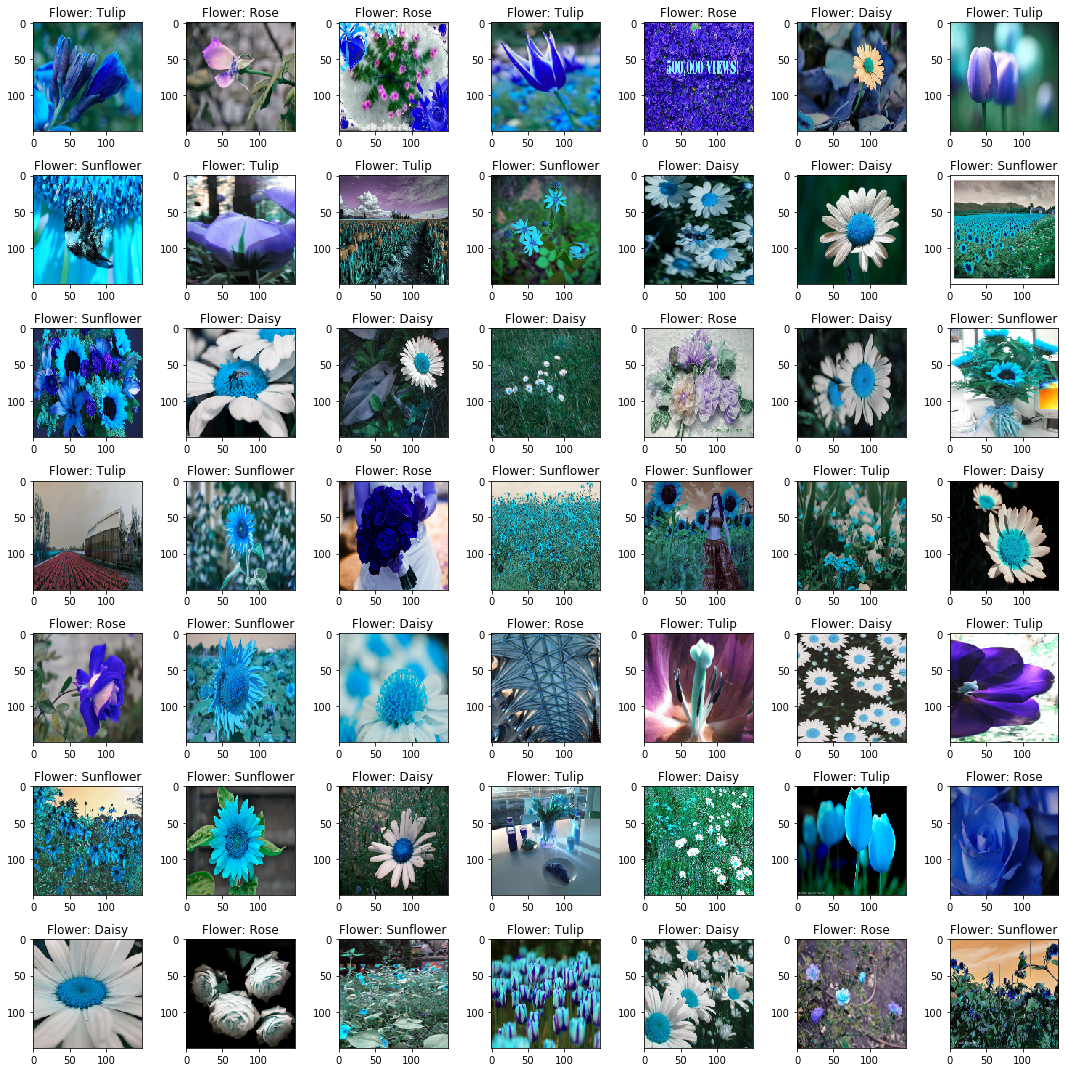

In [0]:
import random as rn
fig,ax=plt.subplots(7,7)
fig.set_size_inches(15,15)
for i in range(7):
    for j in range (7):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le=LabelEncoder()
Y=le.fit_transform(labels)
Y=to_categorical(Y,5)
X=np.array(x_data)
X=X/255

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
genrator = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.2,
                             height_shift_range=0.2,horizontal_flip=True,vertical_flip=False)

In [0]:
genrator.fit(X_train)

# Base CNN Model

In [0]:
img_width=150
img_height=150
model=Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [0]:
epochs=5
batch_size=128
history=model.fit(X_train,y_train,batch_size=batch_size,validation_split=0.1,epochs=epochs,validation_data=(X_test,y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/5
2453/2453 [==============================] - 61s 25ms/sample - loss: 1.5629 - acc: 0.3408 - val_loss: 1.3189 - val_acc: 0.4609
Epoch 2/5
2453/2453 [==============================] - 60s 24ms/sample - loss: 1.1183 - acc: 0.4823 - val_loss: 1.1646 - val_acc: 0.4535
Epoch 3/5
2453/2453 [==============================] - 60s 25ms/sample - loss: 0.9319 - acc: 0.5980 - val_loss: 0.9148 - val_acc: 0.6210
Epoch 4/5
2453/2453 [==============================] - 60s 25ms/sample - loss: 0.8258 - acc: 0.6535 - val_loss: 0.9875 - val_acc: 0.5917
Epoch 5/5
2453/2453 [==============================] - 60s 25ms/sample - loss: 0.7627 - acc: 0.6918 - val_loss: 0.9517 - val_acc: 0.6137


In [0]:
history.history

{'acc': [0.34080717, 0.4822666, 0.5980432, 0.65348554, 0.69180596],
 'loss': [1.5629336620125536,
  1.1182927391843023,
  0.9318994127192693,
  0.8258413331050849,
  0.7626834207051538],
 'val_acc': [0.4608802, 0.45354524, 0.6210269, 0.591687, 0.6136919],
 'val_loss': [1.3188693161990066,
  1.164596137615754,
  0.9148125134062359,
  0.9874644815776051,
  0.9516578565891332]}

In [0]:
def plot_learningCurve(history):
  epoch_range=range(1,6)
  plt.plot(epoch_range,history.history['acc'])
  plt.plot(epoch_range,history.history['val_acc'])
  plt.title=('Model_Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'],loc='uper left')
  plt.show()



  
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title=('Model_Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'],loc='uper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "uper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


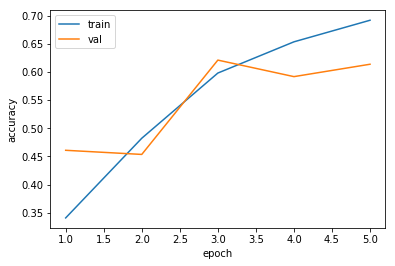

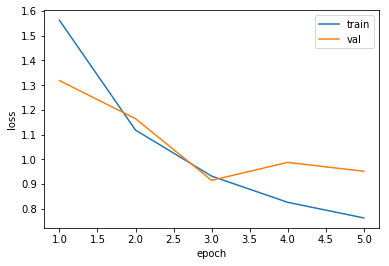

In [0]:
plot_learningCurve(history)

In [0]:
model.evaluate(X_test,y_test,batch_size=128,verbose=1,steps=10)

10/10 [==============================] - 51s 5s/step - loss: 0.9517 - acc: 0.6137


[0.9516578316688538, 0.6136919]

In [0]:
pred=model.predict(X_test)
predict=np.argmax(pred,axis=1)
print(predict)

[3 0 2 0 1 1 3 2 3 3 3 0 3 2 0 0 2 2 3 0 1 0 0 3 0 3 3 3 2 3 1 2 0 3 0 0 0
 2 0 3 2 1 2 0 0 1 2 3 2 0 0 0 2 3 2 2 3 0 3 1 2 0 0 2 0 0 1 3 3 0 2 3 3 0
 2 1 3 2 0 3 0 0 2 2 3 0 3 3 0 3 3 0 3 2 0 3 2 1 0 1 2 3 0 0 0 2 2 1 0 3 2
 0 3 2 0 3 3 2 1 2 0 2 2 0 3 3 0 2 3 2 2 3 0 0 2 0 2 1 3 2 3 3 2 1 1 2 3 2
 1 3 0 0 0 2 0 3 1 3 0 3 3 3 0 3 0 1 2 1 3 3 3 3 2 3 3 3 3 0 1 0 3 0 0 3 3
 0 0 0 0 3 3 3 2 2 3 0 3 3 2 3 3 2 2 3 0 2 0 3 2 1 1 2 0 0 3 2 0 1 1 0 3 3
 3 2 2 3 2 3 1 2 0 0 2 3 3 3 0 3 2 2 1 3 3 2 0 2 3 3 0 2 0 3 2 2 3 0 0 1 2
 3 3 2 2 2 2 2 0 3 2 1 3 3 0 3 0 3 3 2 0 2 0 2 3 1 2 2 2 3 3 2 2 3 3 2 2 2
 3 2 2 3 2 3 0 3 0 2 3 2 0 0 3 0 0 0 3 3 0 0 1 2 1 0 0 2 3 2 3 2 3 1 2 1 2
 0 2 0 3 2 2 2 2 0 1 3 3 0 1 1 2 0 3 3 3 3 0 2 2 2 3 2 0 3 0 2 0 2 1 2 1 0
 2 3 0 2 3 2 2 3 2 3 2 1 2 3 3 3 3 0 2 2 3 0 2 3 0 3 2 3 0 2 3 0 2 3 0 0 2
 2 0 0 3 3 2 2 3 0 3 0 2 0 2 2 0 3 2 3 3 2 0 1 3 2 3 0 2 2 3 3 2 2 3 3 3 0
 2 1 0 0 2 3 3 3 0 0 0 2 2 0 2 0 3 0 0 3 3 2 1 3 0 1 2 2 2 2 3 2 3 2 0 0 0
 3 0 0 1 2 3 3 1 1 3 2 3 

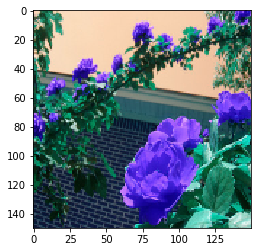

In [0]:
plt.imshow(X_test[6])
plt.show()

In [0]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
# Proper class image recognigation
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

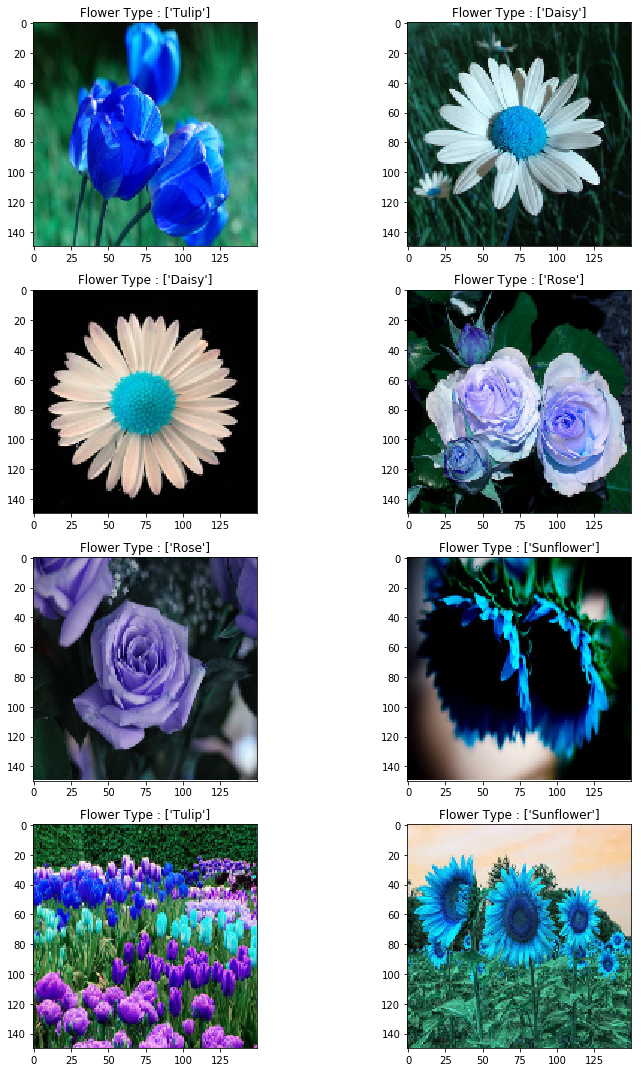

In [0]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Flower Type : "+str(le.inverse_transform([pred_digits[prop_class[count]]])))
        plt.tight_layout()
        count+=1

# VGG16 3 blocks of model

In [0]:
img_width=150
img_height=150

model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5,activation='softmax'))

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
epochs=5
batch_size=128
history=model.fit(X_train,y_train,batch_size=batch_size,validation_split=0.1,epochs=epochs,validation_data=(X_test,y_test))

Train on 2453 samples, validate on 818 samples
Epoch 1/5
2453/2453 [==============================] - 146s 59ms/sample - loss: 4.4848 - acc: 0.3049 - val_loss: 1.2185 - val_acc: 0.4462
Epoch 2/5
2453/2453 [==============================] - 146s 59ms/sample - loss: 1.0151 - acc: 0.5642 - val_loss: 0.9773 - val_acc: 0.5929
Epoch 3/5
2453/2453 [==============================] - 146s 59ms/sample - loss: 0.8433 - acc: 0.6588 - val_loss: 0.9921 - val_acc: 0.5941
Epoch 4/5
2453/2453 [==============================] - 146s 60ms/sample - loss: 0.7108 - acc: 0.7138 - val_loss: 1.1373 - val_acc: 0.5807
Epoch 5/5
2453/2453 [==============================] - 145s 59ms/sample - loss: 0.6135 - acc: 0.7570 - val_loss: 1.0090 - val_acc: 0.6296


In [0]:
def plot_learningCurve(history):
  epoch_range=range(1,6)
  plt.plot(epoch_range,history.history['acc'])
  plt.plot(epoch_range,history.history['val_acc'])
  plt.title=('Model_Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'],loc='uper left')
  plt.show()



  
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title=('Model_Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'],loc='uper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "uper left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


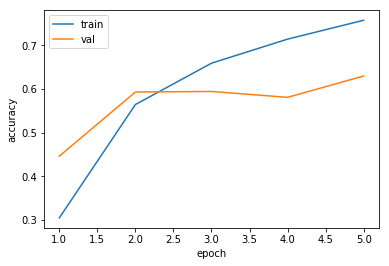

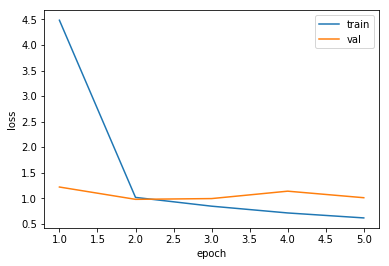

In [0]:
plot_learningCurve(history)

In [0]:
pred=model.predict(X_test)
predict=np.argmax(pred,axis=1)
print(predict)

[1 0 0 0 1 1 3 2 1 0 1 0 3 2 0 0 2 0 3 0 1 0 0 1 3 3 1 1 2 0 1 2 0 3 0 0 0
 2 0 1 2 0 2 0 0 1 0 3 2 0 0 0 2 3 2 2 1 0 0 1 3 0 0 2 0 0 1 3 1 0 0 3 3 0
 0 1 3 0 0 3 0 0 2 2 3 0 3 3 0 3 3 0 1 2 0 3 2 1 0 1 2 1 0 0 0 2 2 1 0 2 3
 0 3 2 0 3 1 2 1 2 0 2 2 0 3 1 0 2 1 2 2 1 0 0 3 0 0 1 3 2 2 3 1 0 1 2 1 2
 0 1 0 0 0 2 0 3 3 0 0 1 3 3 0 3 0 0 2 1 3 3 3 1 2 3 1 3 3 0 1 0 3 0 0 3 3
 1 0 0 0 3 3 3 2 2 1 0 3 0 2 3 1 2 2 1 0 2 0 3 2 0 1 2 0 0 1 2 0 3 3 0 3 1
 1 3 2 3 2 3 3 2 0 0 0 1 3 0 1 3 2 2 1 3 3 2 0 2 3 3 0 2 0 3 2 2 3 0 0 1 0
 3 3 2 0 2 2 3 0 3 1 1 1 3 0 1 0 1 1 2 3 0 0 0 3 1 2 0 2 3 1 2 2 1 1 2 2 2
 1 2 2 1 2 3 0 3 0 0 3 0 0 0 3 0 0 0 1 3 0 0 0 2 0 0 0 2 3 2 1 3 3 1 2 0 2
 0 2 0 3 2 2 2 0 0 1 3 3 0 1 0 2 0 1 1 3 0 0 2 0 2 3 2 0 3 0 2 0 2 1 2 1 0
 0 3 0 2 1 2 2 3 2 3 0 1 2 1 3 3 1 0 2 3 2 0 0 3 0 3 0 3 0 2 3 0 1 1 0 0 2
 2 0 0 1 1 2 2 3 0 3 0 2 2 2 2 0 3 2 3 1 0 0 3 1 0 1 0 2 3 3 3 2 2 0 1 3 0
 2 1 0 0 0 0 3 1 0 0 0 0 0 0 2 0 3 0 0 1 3 2 1 1 0 1 3 2 2 2 3 2 3 2 0 0 0
 1 0 0 1 0 3 3 1 1 1 2 1 

# Batch normalization and dropout

In [0]:
"""model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model=Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1
model=Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))"""

"model=Sequential()\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(img_width,img_height,3)))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(2,2))\nmodel.add(Dropout(0.2))\n\nmodel=Sequential()\nmodel.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(2,2))\nmodel.add(Dropout(0.3))\n\nmodel=Sequential()\nmodel.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform'))\nmodel.add(BatchNormalization())\nmodel.add(MaxPool2D(2,2))\nmodel.add(Dropout(0.5))\n\nmodel.add(Flatten())\nmodel.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))\nmodel.add(BatchNormalization())\nmodel.add(Dropout(0.5))\n\nmodel.add(Dense(5,activation='softmax'))"

In [0]:
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
"""epochs=5
batch_size=128
history=model.fit(X_train,y_train,batch_size=batch_size,validation_split=0.1,epochs=epochs,validation_data=(X_test,y_test))"""

'epochs=5\nbatch_size=128\nhistory=model.fit(X_train,y_train,batch_size=batch_size,validation_split=0.1,epochs=epochs,validation_data=(X_test,y_test))'

In [0]:
"""def plot_learningCurve(history,epoch):
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['acc'])
  plt.plot(epoch_range,history.history['val_acc'])
  plt.title=('Model_Accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'],loc='uper left')
  plt.show()



  
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title=('Model_Loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'],loc='uper left')
  plt.show()"""

In [0]:
#plot_learningCurve(history,5)

In [0]:
#model.evaluate(X_test,y_test,batch_size=128,verbose=1,steps=10)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/My Drive

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive': No such file or directory
